<center>
<img src="../../img/ods_stickers.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

## <center> Assignment 4 (demo)
### <center>  Sarcasm detection with logistic regression
    
**Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit) + [solution](https://www.kaggle.com/kashnitsky/a4-demo-sarcasm-detection-with-logit-solution).**


We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 
<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

In [1]:
# Not applicable
#!ls ../input/sarcasm/

In [2]:
# some necessary imports
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
train_df = pd.read_csv("../../data/archive/train-balanced-sarcasm.csv")

In [4]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


Some comments are missing, so we drop the corresponding rows.

In [6]:
train_df.dropna(subset=["comment"], inplace=True)

We notice that the dataset is indeed balanced

In [7]:
train_df["label"].value_counts()

0    505405
1    505368
Name: label, dtype: int64

We split data into training and validation parts.

In [8]:
train_texts, valid_texts, y_train, y_valid = train_test_split(
    train_df["comment"], train_df["label"], random_state=17
)

## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions

So the tasks are above. Thus for the starters off to go with **Explorative data analysis**.

## Explorative data analysis

In [9]:
print(train_df["subreddit"].value_counts().shape)
train_df["subreddit"].value_counts().to_frame().head()

(14876,)


,subreddit
AskReddit,65674
politics,39493
worldnews,26376
leagueoflegends,21034
pcmasterrace,18987


So there are 14876 subreddit topics, quite a number.

At first I would like to see how the sarcastic comments are distributed in relation to the other features. 
- subreddit
- author
- date (well, maybe people becoming more/less sarcastic as it is)
- score

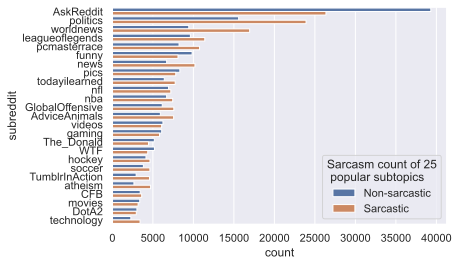

In [10]:
sns.set_theme(style="darkgrid")
%config InlineBackend.figure_format = 'svg'
ax = sns.countplot(y = "subreddit", hue = "label", data = train_df,
             order=train_df.subreddit.value_counts().iloc[:25].index
                  );

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-sarcastic','Sarcastic'], 
          
          title='Sarcasm count of 25\n popular subtopics');


The upper countplot shows, that some of the subtopics (even if to look only at 25 most popular) has non-balanced distribution of sarcastic and non-sarcastic comments. E.g. in the "worldnews" sarcastic comments are posted twice more, than non-sarcastic ones. On the contrary, in "AskReddit" non-sarcastic comments are prevailing.

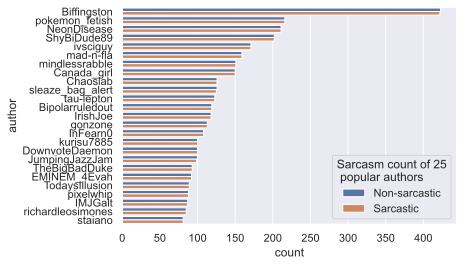

In [11]:
ax = sns.countplot(y = "author", hue = "label", data = train_df,
             order=train_df.author.value_counts().iloc[:25].index
                  );

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-sarcastic','Sarcastic'], 
          
          title='Sarcasm count of 25\n popular authors');

This is a quite suprising results. Perfect balance? Have to check if I did something wrong with plotting.

In [12]:
authors = pd.crosstab(train_df["author"], train_df["label"])

In [13]:
authors.sort_values(by=[0, 1], ascending=[False, False]).head(100)

label,0,1
author,,
Biffingston,423,422
pokemon_fetish,216,216
NeonDisease,211,211
ShyBiDude89,202,202
ivsciguy,171,171
...,...,...
cowboysfan88,50,50
david-me,50,50
Ua_Tsaug,50,49


In [14]:
print(train_df[train_df["author"] == "Biffingston"].shape)

(845, 10)


Well, after all it seems, that the dataset is indeed well-balanced by author feature. So basically the author of the comment is not affecting the degree of sarcasm in it, so it cannot serve as a feature for training the model based on the author (and that is good, that data is not biased in this way).

In [15]:
date = train_df[["label", "date"]].copy()
date['date'] = pd.DatetimeIndex(date['date']).year

In [16]:
date.head()

,label,date
0,0,2016
1,0,2016
2,0,2016
3,0,2016
4,0,2016


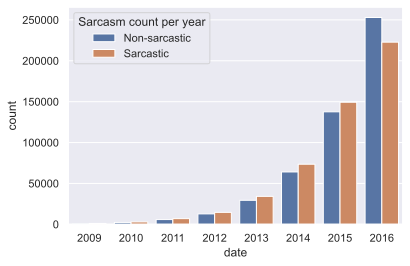

In [17]:
ax = sns.countplot(x = "date", hue = "label", data = date);

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-sarcastic','Sarcastic'], 
          
          title='Sarcasm count per year');

Per year plotting, I think, shows more-or-less equal distribution till 2016, then non-sarcastic became a little more frequent. It's possible to see, that sarcastic commentaries were usually slightly more popular before 2016. But since 2016 is only one year and shift is not too drasastic - it is not enough to make any assumption in changes of patterns of behavior, etc., thus a full dataset may be used as it is.

In [19]:
train_df_copy = train_df.copy()

In [20]:
dict_authors = {}
dict_subreddit = {}

index = 1

for i in train_df_copy["author"].value_counts().index.tolist():
    dict_authors[i] = index
    index += 1
    
index = 1

for i in train_df_copy["subreddit"].value_counts().index.tolist():
    dict_subreddit[i] = index
    index += 1

Leaving only numerical data in here. Encoding authors and subreddits as unique IDs, extracting dates and dropping the textual data. For now.

In [21]:
train_df_copy["author"] = train_df_copy["author"].map(dict_authors)
train_df_copy["subreddit"] = train_df_copy["subreddit"].map(dict_subreddit)
train_df_copy['year_published'] = pd.DatetimeIndex(train_df_copy['date']).year
train_df_copy['month_published'] = pd.DatetimeIndex(train_df_copy['date']).month
train_df_copy.drop(['comment', 'parent_comment', 'created_utc', 'date'], axis=1, inplace=True)

In [22]:
# Ok, so it is cleaned.
train_df_copy.head()

,label,author,subreddit,score,ups,downs,year_published,month_published
0,0,169563,2,2,-1,-1,2016,10
1,0,143982,11,-4,-1,-1,2016,11
2,0,21745,10,3,3,0,2016,9
3,0,64803,79,-8,-1,-1,2016,10
4,0,143657,132,6,-1,-1,2016,12


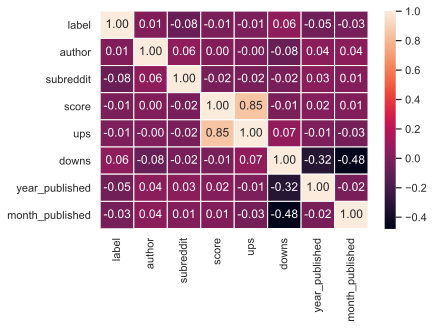

In [23]:
corr = train_df_copy.corr()
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=1.0);


Well, and this is what have to be proved. There is almost no correlation of the label (is it a sarcasm or not) to any of the numerical features, that are left in the dataset (as it was seen from the plots above, but not for all features). So it is not possible to created a model based on such approach (yup, it is clear from the task, yet has to be checked nevertheless).

The last thing I can do in scope of exploratory data analysis is to check comments.

In [24]:
com_sarcasm_df = train_df[train_df['label'] == 1]
com_non_sarcasm_df = train_df[train_df['label'] == 0]

In [25]:
com_sarcasm_df.drop(['author', 'subreddit', 'score', 'ups', 'downs',
                    'date', 'created_utc'], axis=1, inplace=True)
com_non_sarcasm_df.drop(['author', 'subreddit', 'score', 'ups', 'downs',
                    'date', 'created_utc'], axis=1, inplace=True)

C:\Users\RagingTiger\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
com_sarcasm_df.head()

,label,comment,parent_comment
33,1,But they'll have all those reviews!,"The dumb thing is, they are risking their sell..."
44,1,wow it is totally unreasonable to assume that ...,Clinton campaign accuses FBI of 'blatant doubl...
45,1,Ho ho ho... But Melania said that there is no ...,Anyone else think that it was interesting the ...
66,1,I can't wait until @potus starts a twitter war...,Here's what happens when Obama gives up his Tw...
69,1,gotta love the teachers who give exams on the ...,Monday night Drinking thread Brought to You by...


In [27]:
com_non_sarcasm_df.head()

,label,comment,parent_comment
0,0,NC and NH.,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",deadass don't kill my buzz
4,0,I could use one of those tools.,Yep can confirm I saw the tool they use for th...


In [28]:
sarcasm_dict = {}
non_sarcasm_dict = {}

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

for i in com_sarcasm_df["comment"]:
    words = re.findall(r"[\w']+", i)
    
    for word in words:
        word = word.lower()
        if word in sw:
            continue
        else:
            sarcasm_dict[word] = sarcasm_dict.get(word, 0) + 1

for j in com_non_sarcasm_df["comment"]:
    words = re.findall(r"[\w']+", j)
    
    for word in words:
        word = word.lower()
        if word in sw:
            continue
        else:
            non_sarcasm_dict[word] = non_sarcasm_dict.get(word, 0) + 1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RagingTiger\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
sorted(sarcasm_dict.items(), key=lambda x: x[1], reverse=True)

[('yeah', 32304),
 ('like', 26098),
 ('people', 20822),
 ('well', 17979),
 ('get', 17161),
 ('would', 15610),
 ('right', 15299),
 ("that's", 14936),
 ("i'm", 14678),
 ('know', 14438),
 ('one', 13663),
 ('good', 12615),
 ('sure', 12452),
 ('yes', 12051),
 ("can't", 10610),
 ('think', 9576),
 ('oh', 9502),
 ('make', 9340),
 ('obviously', 9204),
 ('really', 9181),
 ('see', 8913),
 ('man', 8912),
 ('never', 8787),
 ('time', 8488),
 ('game', 8413),
 ('need', 8294),
 ("he's", 8183),
 ('better', 8099),
 ('totally', 8028),
 ('forgot', 7991),
 ('way', 7602),
 ('much', 7342),
 ('us', 7267),
 ('could', 6963),
 ('want', 6947),
 ('go', 6826),
 ('great', 6543),
 ('everyone', 6516),
 ('mean', 6502),
 ('clearly', 6495),
 ('thing', 6324),
 ('must', 6208),
 ('going', 6165),
 ("they're", 6030),
 ('even', 5985),
 ('white', 5708),
 ('got', 5679),
 ('wow', 5525),
 ('bad', 5503),
 ('every', 5263),
 ('something', 5237),
 ('real', 5195),
 ('use', 5105),
 ('maybe', 5059),
 ('ever', 5006),
 ('guys', 4973),
 ('fu

In [30]:
sorted(non_sarcasm_dict.items(), key=lambda x: x[1], reverse=True)

[('like', 29642),
 ('would', 19588),
 ('one', 18066),
 ('get', 17497),
 ("i'm", 16614),
 ('think', 15402),
 ('people', 15290),
 ('well', 11855),
 ('good', 11744),
 ("that's", 11558),
 ('know', 11493),
 ('fuck', 10606),
 ('really', 10374),
 ('time', 10340),
 ('yeah', 8794),
 ('even', 8780),
 ('still', 8643),
 ('see', 8610),
 ('make', 8356),
 ('much', 8237),
 ('could', 8157),
 ('right', 8106),
 ('go', 7745),
 ('got', 7651),
 ('game', 7620),
 ('want', 7227),
 ('sure', 6998),
 ('also', 6994),
 ('going', 6935),
 ('pretty', 6900),
 ('way', 6877),
 ('say', 6760),
 ('actually', 6590),
 ('better', 6472),
 ("can't", 6471),
 ('never', 6394),
 ('shit', 6331),
 ('something', 6293),
 ('probably', 6219),
 ('need', 6127),
 ('2', 6034),
 ('first', 6030),
 ('yes', 5778),
 ('back', 5676),
 ("he's", 5636),
 ('thing', 5623),
 ('lol', 5478),
 ('use', 5414),
 ('3', 5349),
 ('someone', 5264),
 ('love', 5256),
 ('1', 5175),
 ('though', 5155),
 ('man', 5043),
 ("i've", 4954),
 ('thanks', 4934),
 ('new', 4852),


Besides some very common language parts (which are mostly cleared out), some words have diffrent frequency of usage in sarcastic and non-sarcastic way (e.g. obviously and so on).

## Build a Tf-Idf + logistic regression

In [31]:
TfidfVectorizer?

In [32]:
# Well, in the materials CountVectorizer was used, not this one. Nevertheless it is just
# more tuned method of counting words frequences
vectorizer = TfidfVectorizer()
logit = LogisticRegression(C=1, solver="lbfgs", n_jobs=-1, random_state = 5)
pipe = Pipeline([("vectorizer", vectorizer), ("logit", logit)])

In [33]:
%%time
pipe.fit(train_texts, y_train)

Wall time: 19.7 s


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('logit', LogisticRegression(C=1, n_jobs=-1, random_state=5))])

In [34]:
round(pipe.score(train_texts, y_train), 3)

0.722

In [35]:
predict = pipe.predict(valid_texts)

In [36]:
accuracy_score(y_valid, predict)

0.6931703958147007

So, accuracy is 69.32%. Worser, than it is offered in the solutions. ***The difference in parameters added to TfidfVectorizer(). ngram_range=(1, 2), max_features=50000, min_df=2***

## Interpretation with eli5

In [37]:
import eli5

In [38]:
eli5.show_weights( estimator=pipe.named_steps["logit"], vec=pipe.named_steps["vectorizer"])

Weight?,Feature
+7.030,obviously
+6.118,totally
+5.813,clearly
+5.215,forgot
+5.182,duh
+5.066,dare
+4.874,dropped
+4.771,yeah
+4.769,because
+4.683,constructive


Obviously is leading the board here, just as it was seen from the exploratory data analysis (looking at words dicts).

So, this interpretation shows how a word choice affects a sarcasm in comment. Compared to the result in solutions - mine focuses only on a sigle word, so another version:

In [39]:
vectorizer_two = TfidfVectorizer(ngram_range=(1, 2))
logit_1 = LogisticRegression(C=1, solver="lbfgs", n_jobs=-1, random_state = 5)
pipe_1 = Pipeline([("vectorizer_two", vectorizer_two), ("logit_1", logit_1)])
pipe_1.fit(train_texts, y_train)
round(pipe_1.score(train_texts, y_train), 3)
predict_1 = pipe_1.predict(valid_texts)
accuracy_score(y_valid, predict_1)

0.7244335045549162

In [40]:
eli5.show_weights( estimator=pipe_1.named_steps["logit_1"], vec=pipe_1.named_steps["vectorizer_two"])

Weight?,Feature
+11.025,obviously
+10.415,clearly
+10.338,yes because
+9.545,because
+9.477,totally
+8.544,yeah because
+6.760,duh
+6.637,how dare
+6.355,good thing
+6.185,shitlord


With this model there are several "expressions" appeared in the list. The accuracy rose to 72.44%, which is actually better than in the solutions (I guess due to not having any more limitation on the features and etc.)

Overall, looking at words frequency itself gave an insight on the words usage, but the model actually confirms, that it can be used for sarcasm detection. 

## Improving the model further with subreddit

Here I'm following pattern of the solution, as it is understandable what is required, but syntactically not explained in materials before.

In [41]:
# Following given pattern above - split subreddits.
train_subreddits, valid_subreddits = train_test_split(train_df["subreddit"], random_state=17)

In [42]:
vectorizer_t = TfidfVectorizer(ngram_range=(1, 2))
vectorizer_sr = TfidfVectorizer()

In [43]:
X_train_texts = vectorizer_t.fit_transform(train_texts)
X_valid_texts = vectorizer_t.transform(valid_texts)

In [44]:
X_train_texts.shape, X_valid_texts.shape

((758079, 1986880), (252694, 1986880))

In [45]:
%%time
X_train_subreddits = vectorizer_sr.fit_transform(train_subreddits)
X_valid_subreddits = vectorizer_sr.transform(valid_subreddits)

Wall time: 2.68 s


In [46]:
X_valid_subreddits

<252694x13255 sparse matrix of type '<class 'numpy.float64'>'
	with 251215 stored elements in Compressed Sparse Row format>

In [47]:
from scipy.sparse import hstack

X_train = hstack([X_train_texts, X_train_subreddits])
X_valid = hstack([X_valid_texts, X_valid_subreddits])

In [48]:
logit_2 = LogisticRegression(C=1, solver="lbfgs", n_jobs=-1, random_state = 5)


In [49]:
logit_2.fit(X_train, y_train)

LogisticRegression(C=1, n_jobs=-1, random_state=5)

In [50]:
%%time
valid_pred = logit_2.predict(X_valid)

Wall time: 123 ms


In [51]:
accuracy_score(y_valid, valid_pred)

0.726416139678821

Adding a subreddit as a part of a model gives a 72.64% of accuracy, which shows 0.2% increase in accuracy from the last model.

## CountVectorizer

Additionally I want to look at simpler version with usage of CountVectorizer, which was shown in the materials.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(train_texts)

CountVectorizer()

In [53]:
len(cv.vocabulary_)

143306

In [54]:
X_train_cv = cv.transform(train_texts)
X_train_cv

<758079x143306 sparse matrix of type '<class 'numpy.int64'>'
	with 7161779 stored elements in Compressed Sparse Row format>

In [55]:
X_test_cv = cv.transform(valid_texts)

In [56]:
%%time
logit_cv = LogisticRegression(solver="lbfgs", n_jobs=-1, random_state = 5)
logit_cv.fit(X_train_cv, y_train)

Wall time: 10.1 s


LogisticRegression(n_jobs=-1, random_state=5)

In [69]:
round(logit_cv.score(X_train_cv, y_train), 4), round(logit_cv.score(X_test_cv, y_valid), 4),

(0.7108, 0.6935)

The results are pretty close to the result got from the first model. But what with "importance" of used words? Is it also the same?

In [58]:
# Using defined functions from the materials to plot data

def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    );
    
def plot_grid_scores(grid, param_name):
    plt.plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_train_score"],
        color="green",
        label="train",
    )
    plt.plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_test_score"],
        color="red",
        label="test",
    )
    plt.legend();

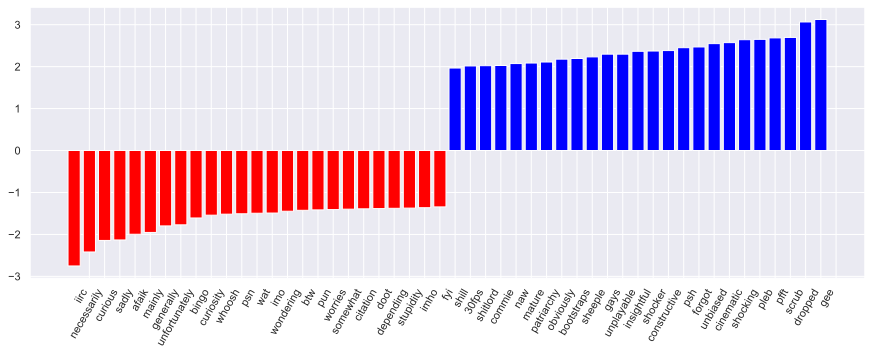

In [59]:
visualize_coefficients(logit_cv, cv.get_feature_names())

The set of words is the same (as far as it could be seen), but weights are different a bit. E.g. "obviously" is not all that impactful, compared to Tf-ldf.

So, Tf-Idf + logistic regression is more accurate in predicting sarcasm, than CountVectorizer + logistic regression for this task (72.44% vs. 69.35%). The maximum accuracy is achieved with addition of subreddit feature to the Tf-Idf and to regression itself (72.64%).